# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv

# Import API key
from api_keys import g_key
gmaps.configure(api_key=g_key)

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
file="../Resources/weather_570_.csv"
data=pd.read_csv(file)
del data["Unnamed: 0"]
data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Vaini,-21.2000,-175.2000,78.80,94,40,11.50,TO,1612698213
1,Ponta do Sol,32.6667,-17.1000,62.01,67,92,3.00,PT,1612698213
2,Rikitea,-23.1203,-134.9692,76.80,75,50,10.83,PF,1612698213
3,Narasapuram,16.4500,81.6667,77.14,61,75,10.65,IN,1612698214
4,Mahébourg,-20.4081,57.7000,87.80,62,40,16.11,MU,1612698214


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
locations=data[["Lat", "Lng"]]
locations.head()

,Lat,Lng
0,-21.2000,-175.2000
1,32.6667,-17.1000
2,-23.1203,-134.9692
3,16.4500,81.6667
4,-20.4081,57.7000


In [4]:
hu=data["Humidity"].astype(float) 
hu.head()

0    94.0
1    67.0
2    75.0
3    61.0
4    62.0
Name: Humidity, dtype: float64

In [5]:
data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.362463,13.155389,51.796684,70.236842,52.566667,8.941123,1.612698e+09
std,32.626549,88.932552,32.226459,21.446587,38.290215,6.916502,7.467075e+01
min,-54.800000,-179.166700,-45.990000,1.000000,0.000000,0.130000,1.612698e+09
25%,-5.639250,-65.590025,30.317500,61.000000,14.250000,3.895000,1.612698e+09
50%,24.280050,16.906150,61.160000,75.500000,54.500000,6.965000,1.612698e+09
75%,46.912050,88.025150,77.257500,86.000000,90.000000,11.852500,1.612698e+09
max,78.218600,179.316700,103.390000,100.000000,100.000000,52.930000,1.612698e+09


Max Humidity = 100%. This is used for the Max Intensity in the heat map as requested.

In [6]:
fig_all=gmaps.figure(map_type="TERRAIN")
humid_all=gmaps.heatmap_layer(locations, weights=hu, dissipating=False, max_intensity=100, point_radius=4)
fig_all.add_layer(humid_all)
fig_all

Figure(layout=FigureLayout(height='420px'))

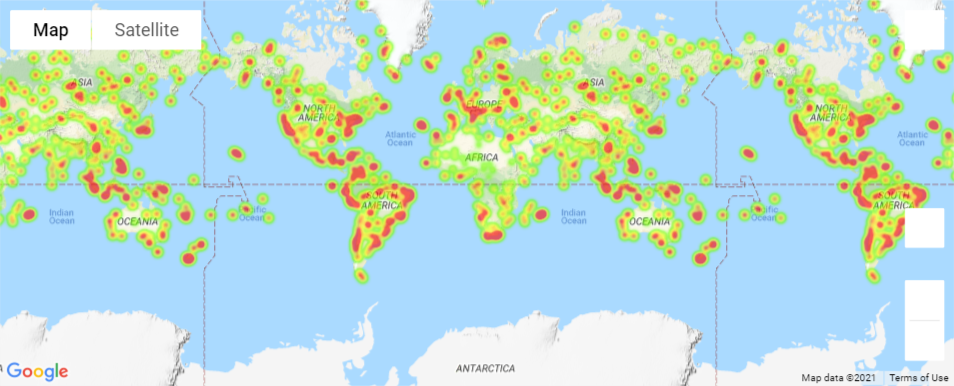

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

Optimal locations for vacation

In [7]:
optimal=data.loc[(data["Max_Temp"]<75) & (data["Max_Temp"]>40) & (data["Humidity"]<75.5) & (data["Wind_Speed"]<10) & (data["Cloudiness"]<15), :]
optimal

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
7,Bara Uchāna,29.4667,76.1667,69.60,33,0,4.41,IN,1612698214
13,New Norfolk,-42.7826,147.0587,55.00,59,7,1.01,AU,1612698216
31,Khanbari,27.3747,87.2039,57.07,46,8,2.57,NP,1612698221
42,Shimoda,34.6667,138.9500,46.00,58,0,1.99,JP,1612698223
48,León,21.1167,-101.6667,48.20,37,1,5.75,MX,1612698225
91,Chui,-33.6971,-53.4616,71.46,66,0,4.61,UY,1612698237
108,Hong Kong,22.2855,114.1577,72.00,59,0,9.82,HK,1612698103
117,Tulsīpur,28.1310,82.2973,59.52,49,0,3.11,NP,1612698244
182,Makakilo City,21.3469,-158.0858,64.40,72,1,3.44,US,1612698263
189,Guerrero Negro,27.9769,-114.0611,55.31,70,0,2.08,MX,1612698266


In [8]:
len(optimal)

30

In [9]:
optimal1=optimal.dropna(how='any')
optimal1=optimal1.reset_index()
optimal1

,index,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,7,Bara Uchāna,29.4667,76.1667,69.60,33,0,4.41,IN,1612698214
1,13,New Norfolk,-42.7826,147.0587,55.00,59,7,1.01,AU,1612698216
2,31,Khanbari,27.3747,87.2039,57.07,46,8,2.57,NP,1612698221
3,42,Shimoda,34.6667,138.9500,46.00,58,0,1.99,JP,1612698223
4,48,León,21.1167,-101.6667,48.20,37,1,5.75,MX,1612698225
5,91,Chui,-33.6971,-53.4616,71.46,66,0,4.61,UY,1612698237
6,108,Hong Kong,22.2855,114.1577,72.00,59,0,9.82,HK,1612698103
7,117,Tulsīpur,28.1310,82.2973,59.52,49,0,3.11,NP,1612698244
8,182,Makakilo City,21.3469,-158.0858,64.40,72,1,3.44,US,1612698263
9,189,Guerrero Negro,27.9769,-114.0611,55.31,70,0,2.08,MX,1612698266


In [10]:
optimal1.describe()

,index,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,255.666667,18.422257,20.562030,63.426333,48.800000,1.266667,5.388333,1.612698e+09
std,154.396787,23.910424,88.493763,9.007050,18.035215,2.753472,2.631247,7.859432e+01
min,7.000000,-42.782600,-158.085800,43.000000,1.000000,0.000000,1.010000,1.612698e+09
25%,133.250000,21.581550,-53.223775,56.980000,35.500000,0.000000,3.425000,1.612698e+09
50%,279.500000,27.675800,37.485300,66.705000,50.500000,0.000000,5.715000,1.612698e+09
75%,344.750000,31.371650,81.772975,71.820000,63.000000,0.750000,6.977500,1.612698e+09
max,554.000000,39.913600,147.058700,73.270000,74.000000,10.000000,9.930000,1.612698e+09


Max Humidity = 74%. This is used for the Max Intensity in the related heat map below as requested.

In [11]:
locations_op=optimal1[["Lat", "Lng"]]
locations_op.head()

,Lat,Lng
0,29.4667,76.1667
1,-42.7826,147.0587
2,27.3747,87.2039
3,34.6667,138.9500
4,21.1167,-101.6667


In [12]:
hu_op=optimal1["Humidity"].astype(float) 
hu_op.head()

0    33.0
1    59.0
2    46.0
3    58.0
4    37.0
Name: Humidity, dtype: float64

In [13]:
fig_op=gmaps.figure(map_type="TERRAIN")
humid_op=gmaps.heatmap_layer(locations_op, weights=hu_op, dissipating=False, max_intensity=74, point_radius=4)
fig_op.add_layer(humid_op)
fig_op

Figure(layout=FigureLayout(height='420px'))

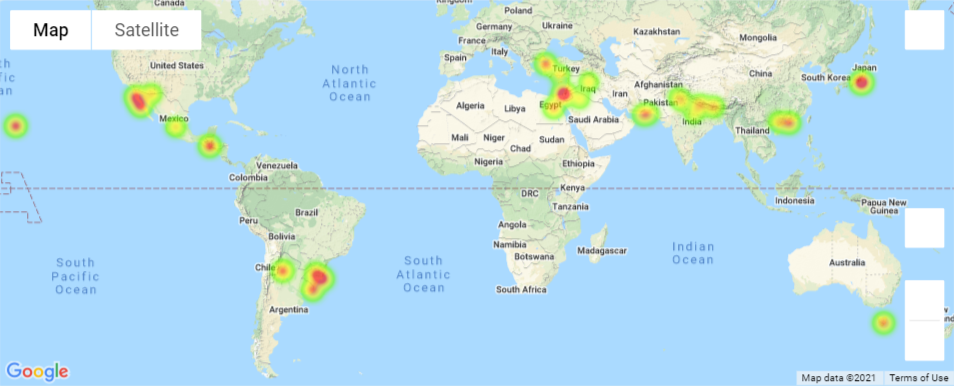

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [14]:
area_h=[]
name_h=[]
lat_h=[]
lng_h=[]
country_h=[]
city_h=[]
b=[]

url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
for a in range(len(locations_op)):
    try:
        op_lat=locations_op["Lat"][a]
        op_lng=locations_op["Lng"][a]
        q_url = f"{url}location={op_lat},{op_lng}&radius=5000&type=hotel&keyword=hotel&opennow&language=en&key={g_key}"
        hn=requests.get(q_url).json()
        area_h.append(hn["results"][0]["vicinity"])
        name_h.append(hn["results"][0]["name"])
        lat_h.append(hn["results"][0]["geometry"]["location"]["lat"])
        lng_h.append(hn["results"][0]["geometry"]["location"]["lng"])
        country_h.append(optimal1["Country"][a])
        city_h.append(optimal1["City"][a])
        b.append(a)
        print(f"Processing Record {a} | {optimal1['City'][a]}, {optimal1['Country'][a]}")
        
    except IndexError:
        print(f"Hotel not found. Skipping...")
        
print(f"Data Retrieval Complete")


Processing Record 0 | Bara Uchāna, IN
Processing Record 1 | New Norfolk, AU
Processing Record 2 | Khanbari, NP
Processing Record 3 | Shimoda, JP
Processing Record 4 | León, MX
Processing Record 5 | Chui, UY
Processing Record 6 | Hong Kong, HK
Processing Record 7 | Tulsīpur, NP
Processing Record 8 | Makakilo City, US
Processing Record 9 | Guerrero Negro, MX
Processing Record 10 | Cidreira, BR
Hotel not found. Skipping...
Processing Record 12 | Susurluk, TR
Processing Record 13 | Kiryat Gat, IL
Hotel not found. Skipping...
Hotel not found. Skipping...
Processing Record 16 | Gwadar, PK
Processing Record 17 | Tateyama, JP
Hotel not found. Skipping...
Processing Record 19 | Gaza, PS
Hotel not found. Skipping...
Processing Record 21 | Sierra Vista, US
Processing Record 22 | Santiago del Estero, AR
Hotel not found. Skipping...
Processing Record 24 | Farīdkot, IN
Processing Record 25 | San Pedro Pinula, GT
Processing Record 26 | Sakakah, SA
Processing Record 27 | Soledade, BR
Hotel not found. 

In [15]:
hn["results"]

[{'business_status': 'OPERATIONAL',
  'geometry': {'location': {'lat': 27.1785122, 'lng': 31.1858082},
   'viewport': {'northeast': {'lat': 27.17983562989273,
     'lng': 31.18711602989272},
    'southwest': {'lat': 27.17713597010728, 'lng': 31.18441637010728}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
  'name': 'فنادق اسيوط',
  'opening_hours': {'open_now': True},
  'photos': [{'height': 562,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118185181414577434777">فنادق اسيوط</a>'],
    'photo_reference': 'ATtYBwKR9W-gPRdzdQkHvYDzSEzqLZ3xO875WM6AR5LR8mg6X4P8P6lg2wYAsWk0pJCZMrVgp4vLnV3CBRx45n55BNZvCvAC3lehvoT0d0b0vH9h5-pGLC84QEGYTbUlsoRLjPf7xGvgu7hIGUAbcLcUxZ8Aw7iw9wZv0vk7AK-d-JBRHQVg',
    'width': 906}],
  'place_id': 'ChIJRTNd3O4LRRQRE1MsfUq8qHY',
  'plus_code': {'compound_code': '55HP+C8 Asyut First, Egypt',
   'global_code': '7GVH55HP+C8'},
  'rating': 3.3,
  'reference': 'ChIJRTNd3O4LRRQRE1MsfUq8qHY',
  'scope

In [16]:
optimal2=pd.DataFrame({
    "City" : optimal1["City"][b], 
    "Country" : optimal1["Country"][b],
    #"check Country" : country_h,
    "Lat" : optimal1["Lat"][b], 
    "Lng" : optimal1["Lng"][b], 
    "Max_Temp" : optimal1["Max_Temp"][b], 
    "Humidity" : optimal1["Humidity"][b],
    "Cloudiness" : optimal1["Cloudiness"][b],
    "Wind_Speed" : optimal1["Wind_Speed"][b],
    "Analysis Date" : optimal1["Date"][b],
    "Hotel Name" : name_h,
    #"Hotel_Area" : area_h,
    "Hotel_lat" : lat_h,
    "Hotel_lng" : lng_h
})
optimal2

,City,Country,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Analysis Date,Hotel Name,Hotel_lat,Hotel_lng
0,Bara Uchāna,IN,29.4667,76.1667,69.60,33,0,4.41,1612698214,Leela Hotel,29.430751,76.217352
1,New Norfolk,AU,-42.7826,147.0587,55.00,59,7,1.01,1612698216,Tynwald Willow Bend Estate,-42.775558,147.076676
2,Khanbari,NP,27.3747,87.2039,57.07,46,8,2.57,1612698221,HOTEL HORIZON & LODGE,27.377773,87.208681
3,Shimoda,JP,34.6667,138.9500,46.00,58,0,1.99,1612698223,ホテルクリフサイド Hotel Cliff Side,34.678225,138.975436
4,León,MX,21.1167,-101.6667,48.20,37,1,5.75,1612698225,Hotel Halley,21.124409,-101.686215
5,Chui,UY,-33.6971,-53.4616,71.46,66,0,4.61,1612698237,Hotel e Motel Sol e Lua,-33.689907,-53.446325
6,Hong Kong,HK,22.2855,114.1577,72.00,59,0,9.82,1612698103,Hyatt Centric Victoria Harbour Hong Kong,22.292654,114.199280
7,Tulsīpur,NP,28.1310,82.2973,59.52,49,0,3.11,1612698244,Star Lodge,28.131615,82.298266
8,Makakilo City,US,21.3469,-158.0858,64.40,72,1,3.44,1612698263,Hampton Inn & Suites Oahu/Kapolei,21.332245,-158.052334
9,Guerrero Negro,MX,27.9769,-114.0611,55.31,70,0,2.08,1612698266,Hotel TerraSal,27.968040,-114.017064


In [17]:
hotel_df=pd.DataFrame({  
    "Hotel Name" : name_h,
    "City" : optimal1["City"][b], 
    "Country" : optimal1["Country"][b],
    "Hotel_Area" : area_h,
    "Hotel_Lat" : lat_h,
    "Hotel_Lng" : lng_h,
    "Humidity" : optimal1["Humidity"][b]
})
hotel_df

,Hotel Name,City,Country,Hotel_Area,Hotel_Lat,Hotel_Lng,Humidity
0,Leela Hotel,Bara Uchāna,IN,Jind,29.430751,76.217352,33
1,Tynwald Willow Bend Estate,New Norfolk,AU,"1 Tynwald Rd, New Norfolk",-42.775558,147.076676,59
2,HOTEL HORIZON & LODGE,Khanbari,NP,Khandbari,27.377773,87.208681,46
3,ホテルクリフサイド Hotel Cliff Side,Shimoda,JP,下田市柿崎 1126-5,34.678225,138.975436,58
4,Hotel Halley,León,MX,"Av. Miguel Alemán 151, Centro, León",21.124409,-101.686215,37
5,Hotel e Motel Sol e Lua,Chui,UY,"RS-699 - Euzébio Izabelino Bermudez, Chuí",-33.689907,-53.446325,66
6,Hyatt Centric Victoria Harbour Hong Kong,Hong Kong,HK,"1 North Point Estate Ln, North Point",22.292654,114.199280,59
7,Star Lodge,Tulsīpur,NP,"Ga Line, Tulsipur",28.131615,82.298266,49
8,Hampton Inn & Suites Oahu/Kapolei,Makakilo City,US,"91-5431 Kapolei Pkwy Suite 900, Kapolei",21.332245,-158.052334,72
9,Hotel TerraSal,Guerrero Negro,MX,"Emiliano Zapata s/n, Fundo Legal, Guerrero Negro",27.968040,-114.017064,70


In [18]:
hotel_df.describe()

,Hotel_Lat,Hotel_Lng,Humidity
count,23.000000,23.000000,23.000000
mean,15.054751,12.928344,53.304348
std,26.358519,91.939807,14.679716
min,-42.775558,-158.052334,21.000000
25%,17.887490,-58.852968,43.500000
50%,27.377773,34.437540,55.000000
75%,31.096880,79.257809,64.500000
max,39.916482,147.076676,74.000000


In [19]:
hotel_df1=pd.DataFrame({  
    "Hotel Name" : name_h,
    "City" : optimal1["City"][b], 
    "Country" : optimal1["Country"][b],
})
hotel_df1

,Hotel Name,City,Country
0,Leela Hotel,Bara Uchāna,IN
1,Tynwald Willow Bend Estate,New Norfolk,AU
2,HOTEL HORIZON & LODGE,Khanbari,NP
3,ホテルクリフサイド Hotel Cliff Side,Shimoda,JP
4,Hotel Halley,León,MX
5,Hotel e Motel Sol e Lua,Chui,UY
6,Hyatt Centric Victoria Harbour Hong Kong,Hong Kong,HK
7,Star Lodge,Tulsīpur,NP
8,Hampton Inn & Suites Oahu/Kapolei,Makakilo City,US
9,Hotel TerraSal,Guerrero Negro,MX


In [20]:
len(hotel_df1)

23

In [21]:
locations_oph=optimal2[["Lat", "Lng"]]
locations_oph.head()

,Lat,Lng
0,29.4667,76.1667
1,-42.7826,147.0587
2,27.3747,87.2039
3,34.6667,138.9500
4,21.1167,-101.6667


In [22]:
hu_oph=optimal2["Humidity"].astype(float) 
hu_oph.head()

0    33.0
1    59.0
2    46.0
3    58.0
4    37.0
Name: Humidity, dtype: float64

In [23]:
locations_mark= hotel_df[["Hotel_Lat", "Hotel_Lng"]]
locations_mark.head()

,Hotel_Lat,Hotel_Lng
0,29.430751,76.217352
1,-42.775558,147.076676
2,27.377773,87.208681
3,34.678225,138.975436
4,21.124409,-101.686215


In [24]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""

In [25]:
hotel_info = [info_box_template.format(**row) for index, row in hotel_df1.iterrows()]

In [26]:
fig_oph=gmaps.figure(map_type="TERRAIN")

humid_oph=gmaps.heatmap_layer(locations_oph, weights=hu_oph, dissipating=False, max_intensity=74, point_radius=4)
markers=gmaps.marker_layer(locations_mark,
                           info_box_content=hotel_info
                          )
fig_oph.add_layer(humid_oph)
fig_oph.add_layer(markers)
fig_oph

Figure(layout=FigureLayout(height='420px'))

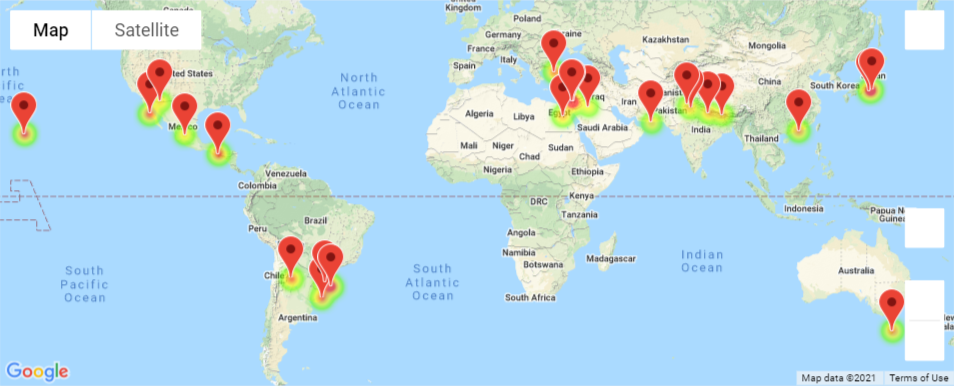

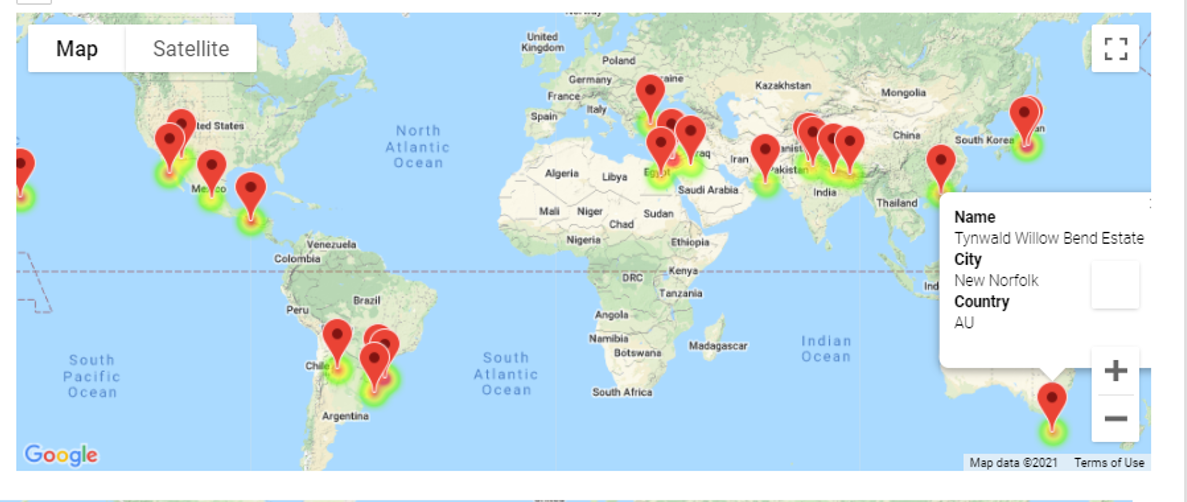